# Pankaj Chaudhari
# TETA19
# Regression

### Importing necessary Libraries

In [4]:
import os
import numpy as np
import pandas as pd

## Simple Regression

### Linear regression is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line. Both variables should be quantitative.

In [5]:
import matplotlib.pyplot as plt
from scipy import stats

### So, to keep it simple i have considered 2 parameters so that we can visualized it more effectivly

In [6]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

In [7]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

In [ ]:
def myfunc(x):
  return slope * x + intercept

In [ ]:
mymodel = list(map(myfunc, x))

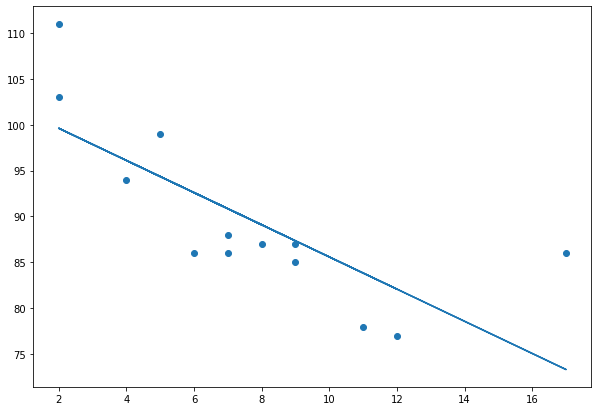

In [2]:
plt.figure(figsize =(10, 7))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

## Multiple Regression

In [3]:
from sklearn import linear_model

df = pd.read_csv("cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

predictedCO2 = regr.predict([[3300, 1300]])

print(predictedCO2)

[114.75968007]


## Polynomial Regression

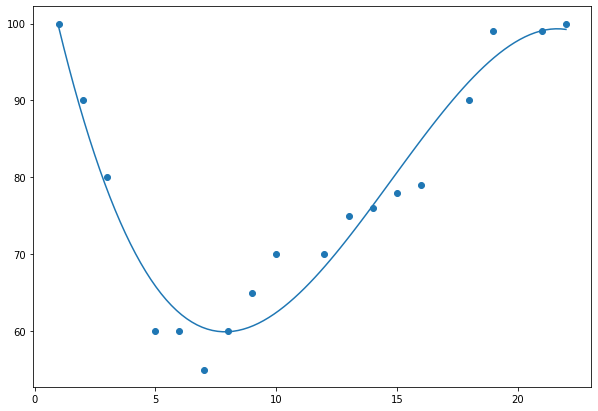

In [4]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.figure(figsize =(10, 7))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

## Logistic Regression

In [8]:
import seaborn as sns

### Import the data set

In [9]:
titanic_data = pd.read_csv('titanic_train.csv')

### Exploratory data analysis

<AxesSubplot:>

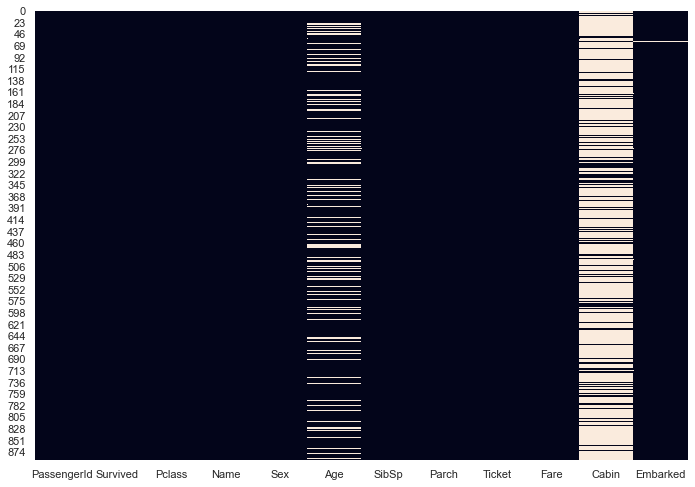

In [13]:
sns.set(rc={"figure.figsize":(11.7,8.27)})
sns.heatmap(titanic_data.isnull(), cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

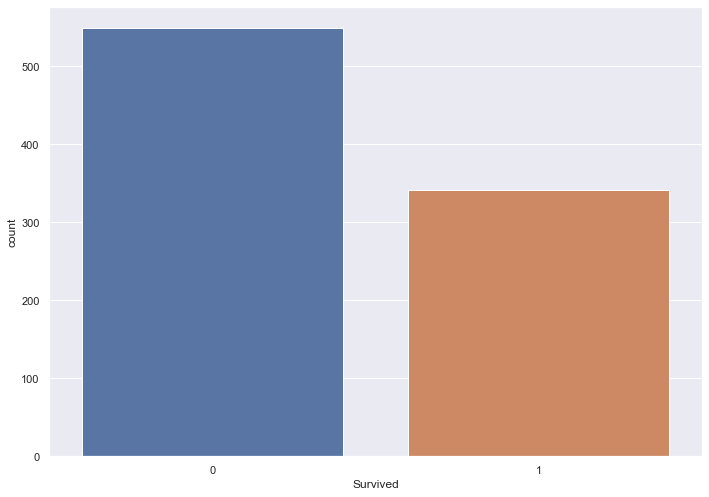

In [14]:
sns.countplot(x='Survived', data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

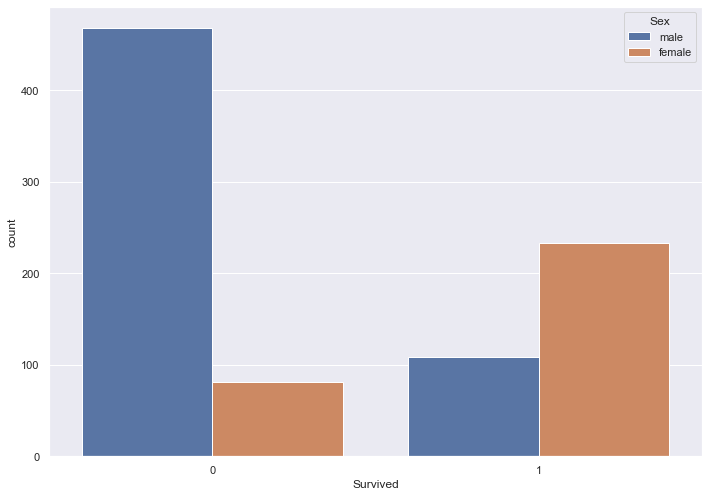

In [15]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

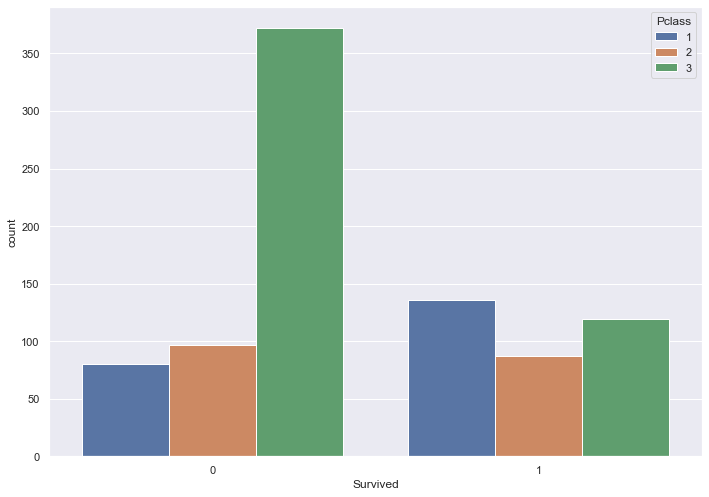

In [16]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

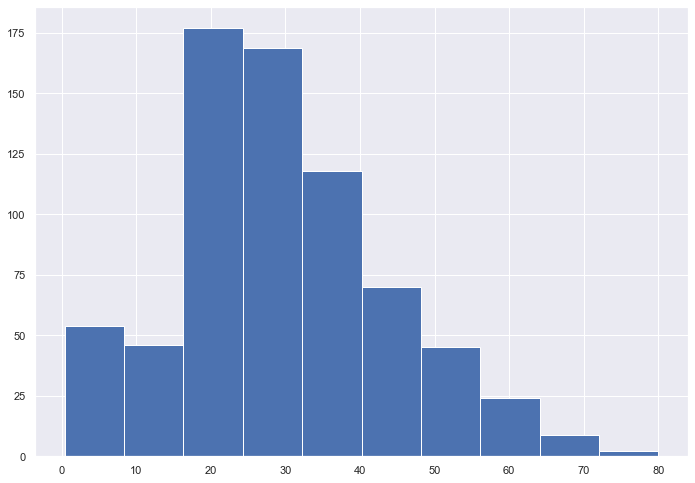

In [17]:
plt.hist(titanic_data['Age'].dropna())

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

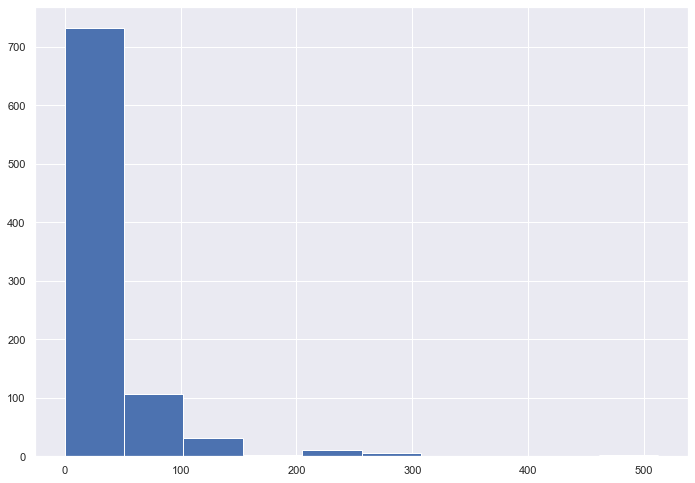

In [18]:
plt.hist(titanic_data['Fare'])

C:\Users\Nutan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

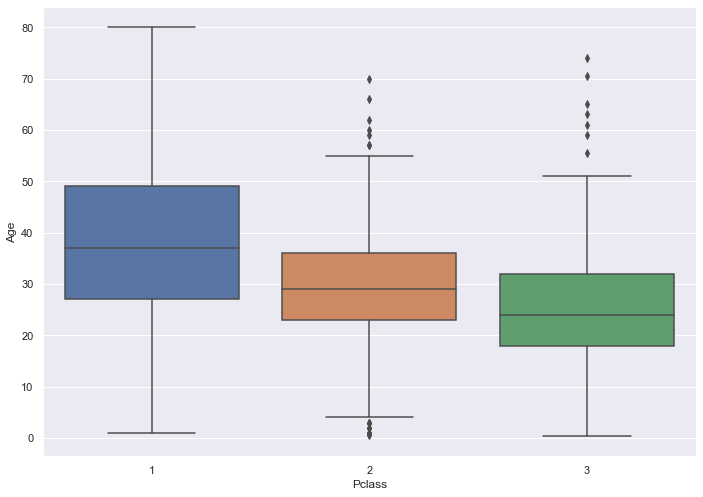

In [19]:
sns.boxplot(titanic_data['Pclass'], titanic_data['Age'])

### Imputation function

In [20]:
def impute_missing_age(columns):
    age = columns[0]
    passenger_class = columns[1]
    
    if pd.isnull(age):
        if(passenger_class == 1):
            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()
        elif(passenger_class == 2):
            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()
        elif(passenger_class == 3):
            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()
        
    else:
        return age

### Impute the missing Age data

In [23]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

### Reinvestigate missing data

<AxesSubplot:>

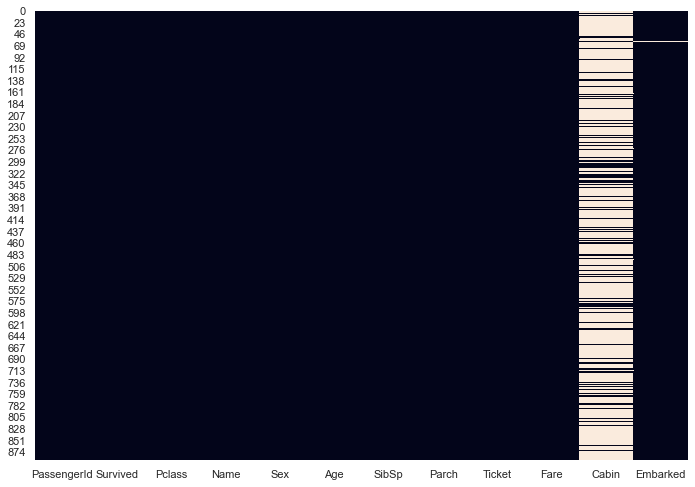

In [24]:
sns.heatmap(titanic_data.isnull(), cbar=False)

### Drop null data

In [25]:
titanic_data.drop('Cabin', axis=1, inplace = True)
titanic_data.dropna(inplace = True)

### Create dummy variables for Sex and Embarked columns

In [26]:
sex_data = pd.get_dummies(titanic_data['Sex'], drop_first = True)
embarked_data = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

### Add dummy variables to the DataFrame and drop non-numeric data

In [27]:
titanic_data = pd.concat([titanic_data, sex_data, embarked_data], axis = 1)
titanic_data.drop(['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

### Print the finalized data set

In [28]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Split the data set into x and y data

In [29]:
y_data = titanic_data['Survived']
x_data = titanic_data.drop('Survived', axis = 1)

### Split the data set into training data and test data

In [30]:
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

### Create the model

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### Train the model and create predictions

In [32]:
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

C:\Users\Nutan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Calculate performance metrics

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       160
           1       0.74      0.68      0.71       107

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.77       267
weighted avg       0.78      0.78      0.78       267



### Generate a confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_data, predictions))

[[135  25]
 [ 34  73]]
